#### Connect the MySQL database ####

In [11]:
import mysql.connector
import pandas as pd
import numpy as np
import torch
import re
import matplotlib.pyplot as plt

In [12]:
connection = mysql.connector.connect(
            host='localhost',
            user='root',
            password='password', # hide my password
            database='PPT'
            )

In [13]:
query = """ SELECT * FROM posts_details"""
df = pd.read_sql(query, connection)

/var/folders/xp/1gy0dsh531s017q00bdzwmgw0000gn/T/ipykernel_28817/2071830198.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [14]:
df.dropna(inplace=True)

In [146]:
df

,id,title,author,date,content,comments,category
0,1,[新聞] 士林夜市大腸包小腸徵店長 「月薪8萬+業2,ujmrfv (UUU),Sun May 5 17:34:11 2024,備註請放最後面 違者新聞文章刪除1.媒體來源 三立新聞網2.記者署名 陳佳鈴3.完整新聞標題...,好了啦/八萬不夠可以十萬啊/利潤居然高成這樣/未看先猜雙頭班 沒人搭班 月休4天/老闆賺的是...,Gossiping
1,2,[問卦] 高雄捷運為什麼車廂這麼少捷運站又熱？,lionelteng (LIN),Sun May 5 17:35:30 2024,我在搭高雄捷運啦，想說體會一下進步城市的大眾運輸工具結果一進到捷運站線就被熱到噴汗台灣不缺電...,,Gossiping
2,3,[問卦] 幾歲發現自己是包莖ㄉ,Himiko9975 (シー・ツー),Sun May 5 17:34:35 2024,各位八卦使用者們晚安啊我是那個在公園研究下一餐的小妹啦各位或多或少都有聽過身邊的人是包莖對吧...,,Gossiping
3,4,[問卦] 這帽子叫什麼名字？共匪帽？,MJdavid (膽固醇歐吉桑),Sun May 5 17:34:24 2024,剛剛看到板上的新聞新聞 金正恩新歌打敗泰勒絲點閱破百萬 Z世代狂狂讚：聽了會上癮影片有個畫面...,,Gossiping
4,5,[新聞] 落選立委後接衛福部政次 林靜儀昔日「驚,super5566go (中共同路人+1),Sun May 5 17:35:49 2024,落選立委後接衛福部政次林靜儀昔日驚句一次看！今日新聞記者陳佩君台北報導新內閣各部會政務次長名...,,Gossiping
...,...,...,...,...,...,...,...
6801,6803,[Vtub] VEE Official 時間表 2024-05-05,lingsk (補眠中...),Sun May 5 01:38:57 2024,VituralEntertainment VEE公式 成員 VEE 商店 時間表公 式 時...,感謝整理!,C_Chat
6802,6804,[新聞] 《鐵達尼號》船長今晨逝世！享壽79歲 經,admeta (陽明山),Sun May 5 23:41:30 2024,SETN《鐵達尼號》船長今晨逝世！享壽79歲經紀人證實娛樂中心林奇樺報導英國演員伯納希爾（B...,叫女人跟小孩先上船那個第一女拳仔?/原來船長有活下來/我還以為船長早就跟船共存亡了/噫，不是...,Gossiping
6803,6805,[問卦] 用過3.5磁片跟5.25磁片的都幾歲了阿？,HDSM (Love Not Change O'_'O),Sun May 5 23:39:39 2024,安安大給賀阿是降的啦本肥想問問說阿應該很多肥宅從小就有用過電腦了啦那用過3.5磁片跟5.25...,40+/問五樓/5.25磁片防寫入要拿貼紙貼起來/樓上== 我還真不知道要撕貼紙/28/用大...,Gossiping
6804,6806,Re: [問卦] 黑熊部隊和海豹部隊誰比較強？,pashow (英雄英雄 膽小的狗！),Sun May 5 23:23:23 2024,引述《kimo21801》之銘言n 黑熊部隊，訓練個人射擊技巧、戰技、急救、民防等技術 ...,/這時候推文會有 哈 急了 的圖嗎//人家戰力有五不錯了/要付錢的不能問嗎？而且價格也不低，...,Gossiping


#### Sentiment Analysis

In [134]:
from keybert import KeyBERT

In [135]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(df['content'][0])
keywords

[('只是有一次洗的時候阿肥隔壁的眼睛仔眼鏡放在池子邊洗一洗一不小心掉下去之後他就趴在池上用手下去撈眼鏡另一隻手拿者臉盆擋住屁股嘴裡喊著要我別肛他操',
  0.7071),
 ('阿肥我在成功嶺的時候有洗過大澡堂', 0.5592),
 ('之銘言', 0.4891),
 ('有沒有八卦', 0.4491),
 ('聽說以前當兵都是一起洗澡是真的嗎', 0.4413)]

In [14]:
def clean_text(text):
    text = re.sub(r"[^\u4e00-\u9fff\d.a-zA-Z%+\-。！？，、；：（ 【】《》“”‘’]", '', text)  # 去除特殊字符
    return text

#### Content summarize

Ckiptagger website: https://github.com/ckiplab/ckiptagger/wiki/Chinese-README

In [64]:
import ckiptagger
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [21]:
#data_utils.download_data_gdown("./ckiptagger_data")

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=3e9a7ffe-bd05-4fc6-920a-8b5dfb058aac
To: /Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/ckiptagger_data/data.zip
100%|██████████| 1.88G/1.88G [00:58<00:00, 32.2MB/s]


In [65]:
ws = WS("./ckiptagger_data/data")
pos = POS("./ckiptagger_data/data")
ner = NER("./ckiptagger_data/data")

/Users/kevinhsu/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-05-06 00:38:49.230921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-06 00:38:49.231160: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-06 00:38:49.249093: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2024-05-06 00:38:49.334214: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-06 00:38:49.350964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 00:38:49.815843: I tensorflow/core/grappler/optimizers/custom_graph_

In [66]:
word_to_weight = {
    "鄉民": 1,
    '據了解':1,
    '不夠':1,
}

In [67]:
dictionary = construct_dictionary(word_to_weight)
print(dictionary)

[(2, {'鄉民': 1.0, '不夠': 1.0}), (3, {'據了解': 1.0})]


In [68]:
sentence_list = [df['content'][1]]

In [72]:
df['content'] = df['content'].apply(clean_text)

In [69]:
clean_text(sentence_list[0])

'我在搭高雄捷運啦，想說體會一下進步城市的大眾運輸工具結果一進到捷運站線就被熱到噴汗台灣不缺電，那為什麼連一點空調都捨不得開？高雄很熱誒然後看一堆車門都掛上鏈子，代表車廂沒這麼多我就覺得奇怪，為什麼不多掛一些車廂？有這方面八卦嗎？--'

In [ ]:
word_sentence_list = ws(
        df['content'],
        sentence_segmentation = True, # To consider delimiters 分隔符號
        # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimit$
        #recommend_dictionary = dictionary1, # words in this dictionary are encouraged 鼓勵，支援
        coerce_dictionary = dictionary, # words in this dictionary are forced 強制
    )

In [71]:
print(word_sentence_list[0])

['我', '在', '搭', '高雄', '捷運', '啦', '，', '想', '說', '體會', '一下', '進步', '城市', '的', '大眾', '運輸', '工具', '結果', '一', '進到', '捷運', '站線', '就', '被', '熱', '到', '噴汗', '台灣', '不', '缺', '電', '，', '那', '為什麼', '連', '一點', '空調', '都', '捨不得', '開', '？', '高雄', '很', '熱', '誒', '然後', '看', '一', '堆', '車門', '都', '掛上', '鏈子', '，', '代表', '車廂', '沒', '這麼多', '我', '就', '覺得', '奇怪', '，', '為什麼', '不', '多', '掛', '一些', '車廂', '？', '有', '這', '方面', '八卦', '嗎', '？', '--']


In [20]:
import jieba

In [147]:
merge_str = df['content'].apply(str)

In [148]:
match = ' '.join(merge_str)

In [149]:
res = str(re.findall(r'[\da-zA-Z\u4e00-\u9fff]+', match))

In [158]:
jieba.load_userdict('special_word.txt')

In [159]:
word_count = {}
str_list = jieba.cut(res,cut_all=False)
for i in str_list:
    if i in word_count:
        word_count[i] +=1
    else:
        word_count[i] = 1

In [160]:
del_words_path ='/Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/delete.txt'
del_words_list = []

In [152]:
with open(del_words_path, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        del_words_list.append(line)
del_result = []
for i in del_words_list:
    del_result.append(i.replace('\n', ''))

In [161]:
keys_to_remove = [key for key, value in word_count.items() if len(key) == 1 or key in del_result]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

In [143]:
keys_to_remove = [key for key, value in word_count.items() if len(key) < 3]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

### WordCloud

In [30]:
from wordcloud import WordCloud
from collections import Counter

In [31]:
font = "/Users/kevinhsu/Downloads/SourceHanSansTW-Regular.otf"

In [32]:
Wcloud = WordCloud(background_color='white', font_path=font)

In [162]:
Wcloud.generate_from_frequencies(word_count)

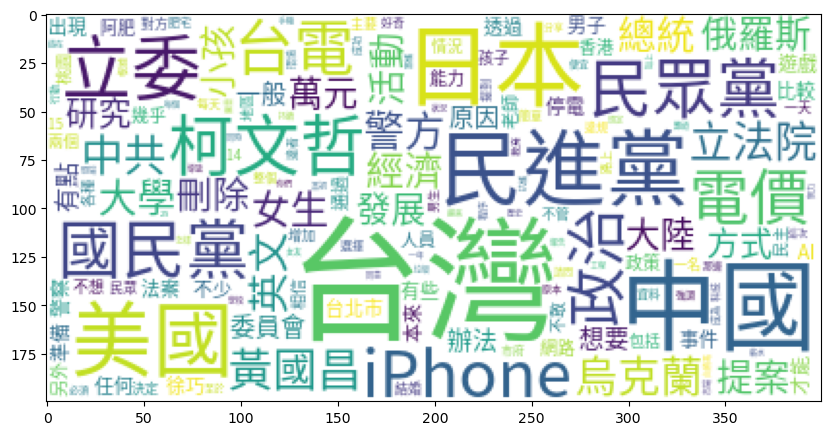

In [163]:
plt.figure(figsize=(10,10))
plt.imshow(Wcloud)
plt.show()